Group Project Proposal : Heart Disease
-

Introduction:
- background info
- question
- identify and describe data set

Read the data into R, clean, and wrangle the data

In [3]:
#code will go here
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [4]:
#read data into r
heart_disease_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data", col_names = FALSE) |>
                    rename(age =X1,
                              sex = X2,
                              cp = X3,
                              trestbps = X4,
                              chol = X5,
                              fbs = X6,
                              restecg = X7,
                              thalach = X8, 
                              exang = X9,
                              oldpeak = X10, 
                              slope = X11, 
                              ca = X12, 
                              thal = X13, 
                              num = X14) |>
                    mutate(num = as_factor(num))
heart_disease_data

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,1,2,140,289,0,0,172,0,0,-9,-9,-9,0
49,0,3,160,180,0,0,156,0,1,2,-9,-9,1
37,1,2,130,283,0,1,98,0,0,-9,-9,-9,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,1,3,110,211,0,0,138,0,0,-9,-9,6,0
47,0,2,140,257,0,0,135,0,1,1,-9,-9,0
53,1,4,130,182,0,0,148,0,0,-9,-9,-9,0


In [5]:
#split data into training and testing groups
heart_disease_split <- initial_split(heart_disease_data, prop = .75, strata = num)
                        
heart_disease_training <- training(heart_disease_split)
                        
heart_disease_testing <- testing(heart_disease_split)

heart_disease_training
heart_disease_testing

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
54,1,4,130,242,0,0,91,1,1,2,-9,-9,2
55,1,4,140,201,0,0,130,1,3,2,-9,-9,1
49,1,4,150,222,0,0,122,0,2,2,-9,-9,4


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
49,0,3,160,180,0,0,156,0,1,2,-9,-9,1
39,1,3,120,339,0,0,170,0,0,-9,-9,-9,0
48,0,2,120,284,0,0,120,0,0,-9,-9,-9,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
51,0,3,130,220,0,0,160,1,2,1,-9,-9,0
53,1,2,120,-9,0,0,132,0,0,-9,-9,-9,0
48,1,3,110,211,0,0,138,0,0,-9,-9,6,0


Methods:
- explain how you will conduct the analysis and which variables will be used

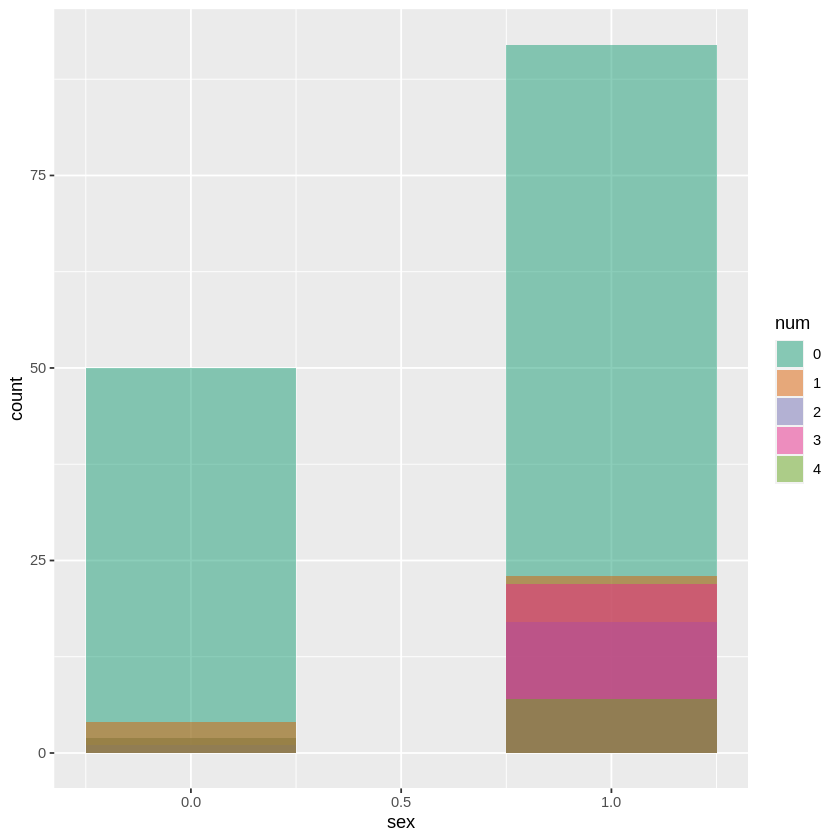

In [20]:
heart_disease_hist <- heart_disease_training |>
ggplot(aes(x = sex, fill = num)) +
geom_histogram(bins = 3, alpha = 0.5, position = "identity") +
scale_fill_brewer(palette = "Dark2") 
heart_disease_hist

In [23]:
heart_disease_count <- heart_disease_training |>
count(sex)

ERROR: Error in eval(expr, envir, enclos): object 'heart_disease' not found


Decsribe at least one way you will visualize the result:
- idk

Expected outcomes and significance:
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?